In [31]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## В этом проекте будем использовать библиотеку TensorFlow

В этом руководстве используется набор данных **MNIST** - база рукописных цифр
Набор данных из `60000 изображений` в оттенках серого размером `10 × 10` из 10 цифр, а также тестовый набор из 10000 изображений.

In [32]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Загрузка набора данных возвращает четыре массива NumPy:


1. Массивы `train_images` и `train_labels` — это данные, которые использует модель для обучения
2. Массивы `test_images` и `test_labels` используются для тестирования модели

Имена классов не включены в набор данных, поэтому прописываем сами:

In [33]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

## Исследование данных

Рассмотрим формат набора данных перед обучением модели.

In [34]:
train_images.shape #В обучающем наборе имеется 60 000 изображений, каждое изображение представлено как 10 x 10 пикселей

test_images.shape #В тестовом наборе имеется 10 000 изображений, каждое изображение представлено как 10 x 10 пикселей

len(train_labels) #В учебном наборе 60 000 меток

len(test_labels) #В тестовом наборе 10 000 меток

train_labels #Каждая метка представляет собой целое число от 0 до 9 (Показывается первые 3 метки и последние 3 метки)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Предварительная обработка данных

Перед подготовкой модели данные должны быть предварительно обработаны. Проверим первое изображение в тренировочном наборе, и увидим, что значения пикселей находятся в диапазоне от 0 до 255:

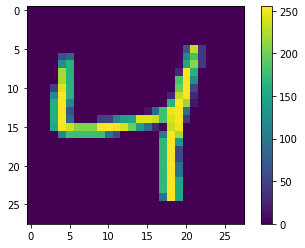

In [36]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)

Мы масштабируем эти значения до диапазона от 0 до 1:

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Отобразим первые `25 изображений` из тренировочного набора и покажем имя класса под каждым изображением.

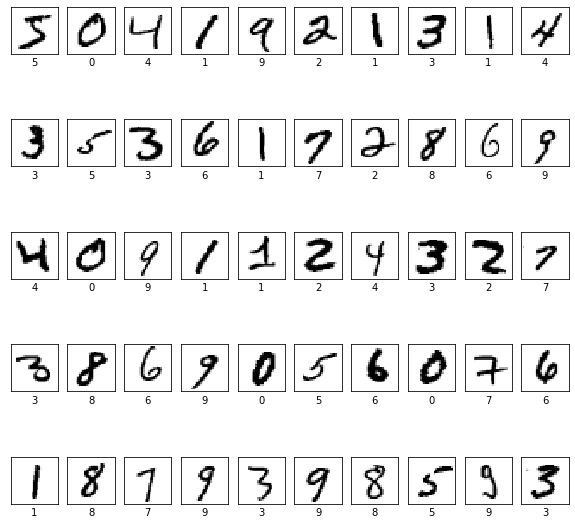

In [42]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Построение модели

Построение нейронной сети требует настройки слоев модели.

Большая часть глубокого обучения состоит в объединении простых слоев. Большинство слоев, таких как `tf.keras.layers.Dense`, имеют параметры, которые изучаются во время обучения.

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Первый слой в сети `tf.keras.layers.Flatten` преобразует формат изображений из 2d-массива (10 на 10 пикселей) в 1d-массив из 10 * 10 = 100 пикселей. У этого слоя нет параметров для изучения, он только переформатирует данные.


Следующие два слоя это `tf.keras.layers.Dense`. Это плотно связанные или полностью связанные нейронные слои. 
1. Первый слой `Dense` содержит 128 узлов (или нейронов). 
2. Второй (и последний) уровень — это слой с 10 узлами `tf.nn.softmax`, который возвращает массив из десяти вероятностных оценок, сумма которых равна 1. Каждый узел содержит оценку, которая указывает вероятность того, что текущее изображение принадлежит одному из 10 классов.

## Скомпилирование модели

Прежде чем модель будет готова к обучению, ей потребуется еще несколько настроек. Они добавляются во время этапа компиляции модели:

`Loss function (функция потери)` — измеряет насколько точная модель во время обучения
`Optimizer (оптимизатор)` — это то, как модель обновляется на основе данных, которые она видит, и функции потери
`Metrics (метрики)` — используется для контроля за этапами обучения и тестирования

In [44]:
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Обучение модели

Шаги:

1. Подача данных обучения модели (в этом примере — массивы `train_images` и `train_labels`)
2. Модель учится ассоциировать изображения и метки
3. Мы просим модель сделать прогнозы о тестовом наборе ( `test_images`). Мы проверяем соответствие прогнозов меток из массива меток (`test_labels`)

Начать обучение `model.fit`:

In [45]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2535 - accuracy: 0.9277
Epoch 2/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1131 - accuracy: 0.9661
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0780 - accuracy: 0.9764
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0589 - accuracy: 0.9821
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0457 - accuracy: 0.9861


При моделировании модели отображаются показатели `потерь (loss)` и `точности (acc)`. Эта модель достигает точности около 0,98 (или 98%) по данным обучения.

## Оценка точности

Сравним, как модель работает в тестовом наборе данных:

In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0795 - accuracy: 0.9755
Test accuracy: 0.9755


## Прогнозирование

In [47]:
predictions = model.predict(test_images)

In [48]:
predictions[0]

array([6.0733010e-09, 1.4513530e-09, 1.0066959e-07, 1.9248524e-04,
       4.2528342e-11, 1.1271571e-08, 7.2770525e-14, 9.9980682e-01,
       6.8854739e-08, 4.1807240e-07], dtype=float32)

Предсказание представляет собой массив из 10 чисел. Они описывают «уверенность» модели в том, что изображение соответствует каждому из 10 разных цифр. Мы можем видеть, какая метка имеет наибольшее доверительное значение:

In [49]:
np.argmax(predictions[0]) #7

7

Напишем функции для визуализации этих предсказаний

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Посмотрим на 0-е изображение, предсказания и массив предсказаний.

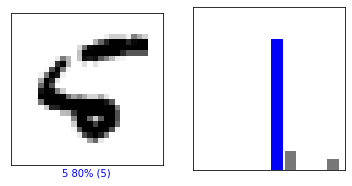

In [59]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Построим несколько изображений с их прогнозами. Правильные метки прогноза — синие, а неправильные метки прогноза — красные.

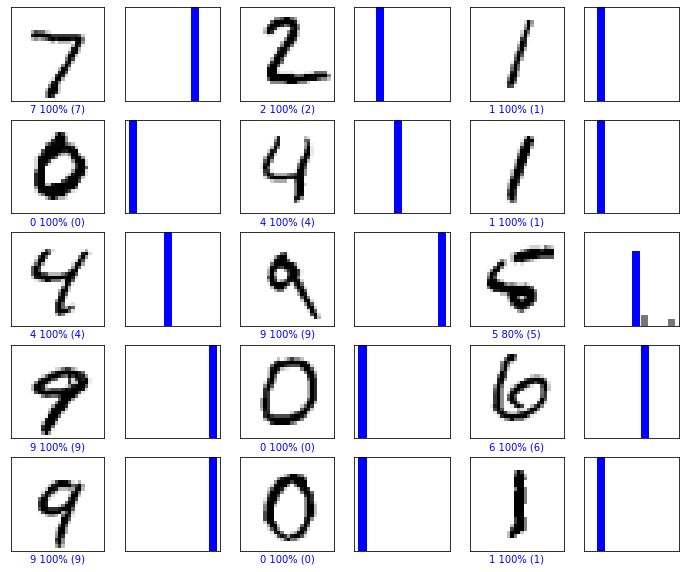

In [60]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Наконец, используем обученную модель, чтобы сделать предсказание об одном изображении.

In [61]:
# Возьмём изображение из тестового набора данных
img = test_images[0]

In [62]:
#Добавим изображение в пакет, где он является единственным членом
img = (np.expand_dims (img, 0))

Прогноз для изображения:

In [63]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.07328943e-09 1.45135026e-09 1.00669396e-07 1.92484877e-04
  4.25283420e-11 1.12715499e-08 7.27702471e-14 9.99806821e-01
  6.88546109e-08 4.18071608e-07]]


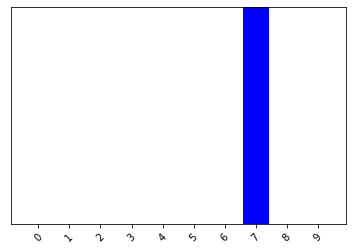

In [64]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [65]:
np.argmax(predictions_single[0])

7

Капча